In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [2]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [3]:
!head adult.data

"head" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [4]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [5]:
df = pd.read_csv('adult.data', sep=',', names=cols)

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Сколько мужчин и женщин?

In [7]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

# Средний возраст мужчин и женщин?

In [8]:
df.groupby('sex')['age'].mean()

sex
 Female    36.858230
 Male      39.433547
Name: age, dtype: float64

# Какая доля граждан США (United-States) в данном датасете?

In [35]:
len(df[df['native-country'] == ' United-States']) / len(df)

0.895857006848684

# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

Text(0.5, 0, 'Educational institutions')

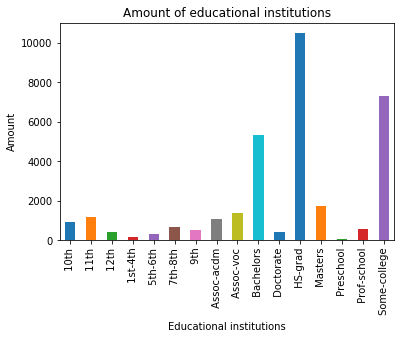

In [36]:
education = df.groupby('education').size()
education.plot.bar()
plt.title('Amount of educational institutions')
plt.ylabel('Amount')
plt.xlabel('Educational institutions')

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [51]:
df[df['marital-status'] == ' Divorced']['fnlwgt'].mean()

185802.79045689848

In [52]:
df[df['marital-status'] == ' Divorced']['fnlwgt'].std()

105646.78945933603

(array([171., 140., 123., 120., 131., 279., 278., 201., 257., 275., 382.,
        389., 292., 224., 171., 135., 119., 103.,  83.,  69.,  84.,  72.,
         78.,  50.,  40.,  31.,  26.,  24.,  16.,   9.,  10.,  10.,   6.,
          8.,   4.,   4.,   5.,   3.,   1.,   2.,   1.,   0.,   3.,   0.,
          0.,   2.,   2.,   0.,   1.,   3.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  19410.  ,   34062.95,   48715.9 ,   63368.85,   78021.8 ,
          92674.75,  107327.7 ,  121980.65,  136633.6 ,  151286.55,
         165939.5 ,  180592.45,  195245.4 ,  209898.35,  224551.3 ,
         239204.25,  253857.2 ,  268510.15,  283163.1 ,  297816.05,
         312469.  ,  327121.95,  341774.9 ,  3

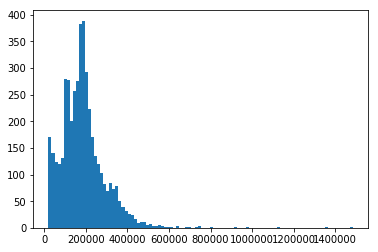

In [53]:
plt.hist(df[df['marital-status'] == ' Divorced']['fnlwgt'], bins=100)

> Ответ: оно мне напоминает распределение Пуассона

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [74]:
rich_intellectuals = df[(df['result'] == ' >50K') & ((df['education'] == ' Bachelors') | (df['education'] == ' Masters') | (df['education'] == ' Doctorate'))]

In [75]:
rich_downs = df[(df['result'] == ' >50K') & (df['education'] != ' Bachelors') & (df['education'] != ' Masters') & (df['education'] != ' Doctorate')]

> Ответ: Правда / Нет.

In [76]:
if (len(rich_intellectuals) > len(rich_downs)):
    print("Правда")
else:
    print("Нет")

Нет


# Сколько в среднем работают люди в неделю в зависимости от education?

In [77]:
df.groupby('education')['hours-per-week'].mean()

education
 10th            37.052519
 11th            33.925957
 12th            35.780600
 1st-4th         38.255952
 5th-6th         38.897898
 7th-8th         39.366873
 9th             38.044747
 Assoc-acdm      40.504217
 Assoc-voc       41.610709
 Bachelors       42.614006
 Doctorate       46.973366
 HS-grad         40.575374
 Masters         43.836332
 Preschool       36.647059
 Prof-school     47.425347
 Some-college    38.852284
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - мужчины или женщины?

In [78]:
df.groupby('sex')['hours-per-week'].mean()

sex
 Female    36.410361
 Male      42.428086
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [83]:
df.groupby('marital-status')['hours-per-week'].mean()

marital-status
 Divorced                 41.246680
 Married-AF-spouse        41.130435
 Married-civ-spouse       43.284856
 Married-spouse-absent    39.669856
 Never-married            36.939998
 Separated                39.301463
 Widowed                  32.979859
Name: hours-per-week, dtype: float64

# Из каких стран люди работают farmers/fishers?

In [92]:
df[df['occupation'] == ' Farming-fishing']['native-country'].drop_duplicates()

16        United-States
255            Cambodia
500              Poland
771           Guatemala
861              Mexico
2353            England
3532                  ?
6006        Philippines
6559              Italy
8551        Puerto-Rico
11271           Vietnam
12621           Germany
15177             Japan
16486            Canada
20549        Yugoslavia
21145              Cuba
22391          Portugal
25761       El-Salvador
25943              Hong
28654           Ireland
29466            France
Name: native-country, dtype: object

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [94]:
df['hours-per-week'].max()

99

In [95]:
df[df['hours-per-week'] == 99].shape[0]

85

In [96]:
df[df['hours-per-week'] == 99]['result']

935        >50K
1172       >50K
1887       >50K
3578       >50K
4086      <=50K
4308      <=50K
4441       >50K
5376      <=50K
5432      <=50K
6618      <=50K
6898      <=50K
8072      <=50K
8393       >50K
8654      <=50K
8796       >50K
9811      <=50K
9831      <=50K
10143     <=50K
10266     <=50K
10468     <=50K
10986      >50K
11833     <=50K
12209     <=50K
12625     <=50K
12788     <=50K
13558      >50K
13580     <=50K
13617     <=50K
13858      >50K
14593     <=50K
          ...  
23226     <=50K
23398     <=50K
23649      >50K
23830     <=50K
24483      >50K
25354     <=50K
25713      >50K
25806     <=50K
25831      >50K
25986     <=50K
26250     <=50K
26596      >50K
26638     <=50K
26858     <=50K
27222     <=50K
27764     <=50K
27809     <=50K
28112     <=50K
29187      >50K
29751     <=50K
29989      >50K
30036      >50K
30610      >50K
30754     <=50K
30766      >50K
30992     <=50K
31681      >50K
31699     <=50K
32469     <=50K
32531     <=50K
Name: result, Length: 85